In [ ]:
# IMPORT DATA

import pandas as pd
df = pd.read_csv("./matches_1930_2022.csv")
df = pd.DataFrame(df, columns= ['home_team','away_team','home_score', 'away_score'])
df.head(5)

,home_team,away_team,home_score,away_score
0,Croatia,Morocco,2,1
1,France,Morocco,2,0
2,Morocco,Portugal,1,0
3,England,France,1,2
4,Croatia,Brazil,1,1


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
B=nx.Graph()
Home_Team=df['home_team']
Away_Team=df['away_team']
print('Đôi sân nhà:', Home_Team.nunique())
print('Số nước tham gia:', Away_Team.nunique()) 
print('Số cạnh', len(df))

Đôi sân nhà: 81
Số nước tham gia: 86
Số cạnh 904


In [ ]:
# ADD NODES AND EDGES
for index, row in df.iterrows():
    B.add_edge(row['home_team'], row['away_team'], weight=1)
B.add_nodes_from(Home_Team, bipartite=0)
B.add_nodes_from(Away_Team, bipartite=1)

<Figure size 400x400 with 0 Axes>

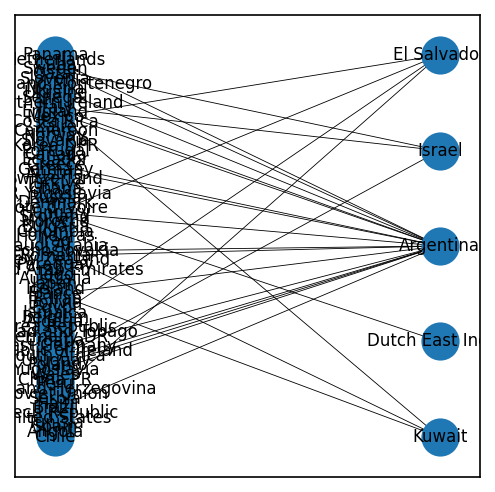

In [ ]:
# 2-sided graph modeling
from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B, Home_Team), font_size=8, width=0.4)

In [ ]:
# # 1-sided graph modeling
import networkx as nx
graph = nx.from_pandas_edgelist(
    df,
    source="home_team",
    target="away_team",
    edge_attr=["home_score"],
    create_using=nx.DiGraph
)
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges() 
stats = pd.DataFrame(graph.nodes()) 
stats.columns = ['Node']

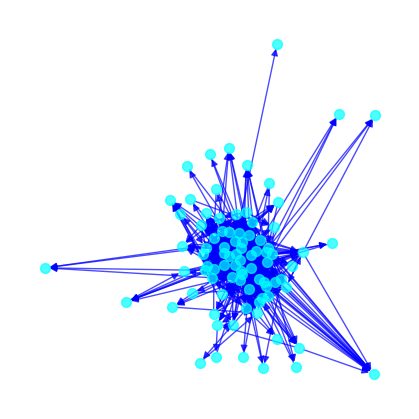

In [ ]:
import matplotlib.pyplot as plt 
import networkx as nx
pos = nx.spring_layout(graph,k=0.15, iterations=20)
plt.figure(figsize=(4,4)) 
edge_width = [0.1*graph[u][v]['home_score'] for u,v in graph.edges()] 
nx.draw(graph,pos, node_size = 50, node_color = 'cyan', 
          alpha=0.7, edge_color='blue', with_labels= False , width=True)
plt.show() 

In [ ]:
# Export file csv
labels = nx.get_edge_attributes(B, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'mydata2.csv', index = False, header=True)

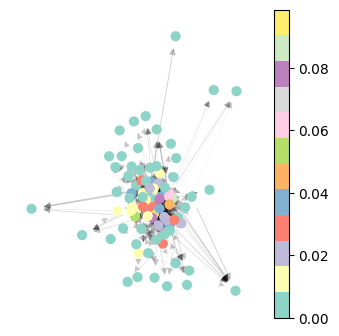

In [ ]:
# Visualize Betweeness

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='Set3',
                               node_color=list(nx.betweenness_centrality(graph).values()))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='black', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
# Top 10 Betweeness

betweeness_centrality = [v for k, v in nx.betweenness_centrality_subset(graph, graph.nodes, graph.nodes).
                         items()]
stats[ 'Betweeness'] = betweeness_centrality
stats_betweeness_centrality = stats[['Node', 'Betweeness']]
stats_betweeness_centrality.sort_values(by = 'Betweeness', ascending = False).head(10)

,Node,Betweeness
5,Brazil,705.185831
4,England,604.954436
8,Spain,592.045979
45,Italy,557.668240
6,Netherlands,550.605547
16,Uruguay,438.138858
2,France,434.958212
27,Mexico,362.282892
32,Sweden,335.887592
22,Germany,279.291328


In [ ]:
stats_betweeness_centrality = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    stats_betweeness_centrality = stats_betweeness_centrality.append({'source': key[0], 
    'target': key[1], 'weight': value}, ignore_index=True)
stats_betweeness_centrality.to_csv(r'betweeness.csv', index = False, header=True)

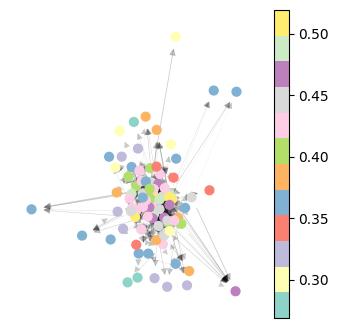

In [ ]:
# Visualize Closeness

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='Set3',
                               node_color=list(nx.closeness_centrality(graph).values()))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='black', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
# Top 10 Closeness

closeness_centrality = [v for k, v in nx.closeness_centrality(graph.reverse(), wf_improved = False).
                         items()]
stats[ 'Closeness'] = closeness_centrality
stats_closeness_centrality = stats[['Node', 'Closeness']]
stats_closeness_centrality.sort_values(by = 'Closeness', ascending = False).head(10)

,Node,Closeness
5,Brazil,0.648855
4,England,0.582192
22,Germany,0.582192
45,Italy,0.582192
8,Spain,0.570470
16,Uruguay,0.566667
32,Sweden,0.559211
6,Netherlands,0.559211
2,France,0.544872
70,West Germany,0.544872


In [ ]:
stats_closeness_centrality = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    stats_closeness_centrality = stats_closeness_centrality.append({'source': key[0], 
    'target': key[1], 'weight': value}, ignore_index=True)
stats_closeness_centrality.to_csv(r'closeness.csv', index = False, header=True)

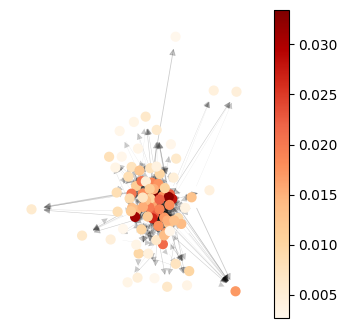

In [ ]:
# Visualize Pagerank algorithm

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='OrRd',
                               node_color=list(nx.pagerank(graph).values()), nodelist= nx.pagerank(graph))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='black', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
# Top 10 Pagerank

pagerank = [v for k, v in nx.pagerank(graph).
                         items()]
stats[ 'Pagerank'] = pagerank
stats_pagerank = stats[['Node', 'Pagerank']]
stats_pagerank.sort_values(by = 'Pagerank', ascending = False).head(10)

,Node,Pagerank
8,Spain,0.033433
16,Uruguay,0.032484
27,Mexico,0.030977
4,England,0.028032
6,Netherlands,0.026655
3,Portugal,0.022916
5,Brazil,0.022614
2,France,0.022348
45,Italy,0.022118
30,IR Iran,0.021325


In [ ]:
stats_pagerank = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    stats_pagerank = stats_pagerank.append({'source': key[0], 
    'target': key[1], 'weight': value}, ignore_index=True)
stats_pagerank.to_csv(r'pagerank.csv', index = False, header=True)

In [ ]:
from sklearn.cluster import KMeans

df3 = pd.DataFrame(df, columns = ['home_score', 'away_score'])
df3

,home_score,away_score
0,2,1
1,2,0
2,1,0
3,1,2
4,1,1
...,...,...
899,3,0
900,2,1
901,3,1
902,3,0


In [ ]:
import numpy as np
x = np.array(df['home_score'])
y = np.array(df['away_score'])

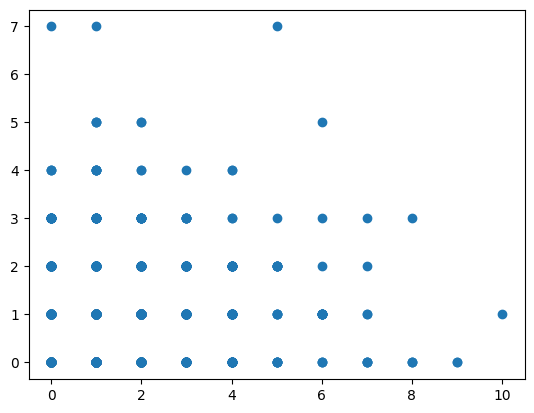

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
x1 = np.array(df['home_score']).reshape(-1, 1)
x2 = np.array(df['away_score']).reshape(-1, 1)
X = np.concatenate((x1, x2), axis = 0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

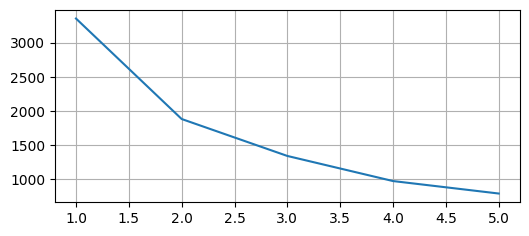

In [ ]:
# define cluster = 2
X = df3
distrorions=[]
for k in range(1,6,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distrorions.append(kmeans.inertia_)

fig = plt.figure(figsize=(6, 2.5))
plt.plot(range(1,6,1), distrorions)
plt.grid(True)

In [ ]:
km = KMeans(n_clusters = 2)
km
y_predicted = km.fit_predict(df[['home_score', 'away_score']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
df['cluster'] = y_predicted
df

,home_team,away_team,home_score,away_score,cluster
0,Croatia,Morocco,2,1,0
1,France,Morocco,2,0,0
2,Morocco,Portugal,1,0,0
3,England,France,1,2,0
4,Croatia,Brazil,1,1,0
...,...,...,...,...,...
899,Chile,Mexico,3,0,1
900,Yugoslavia,Brazil,2,1,0
901,Romania,Peru,3,1,1
902,United States,Belgium,3,0,1


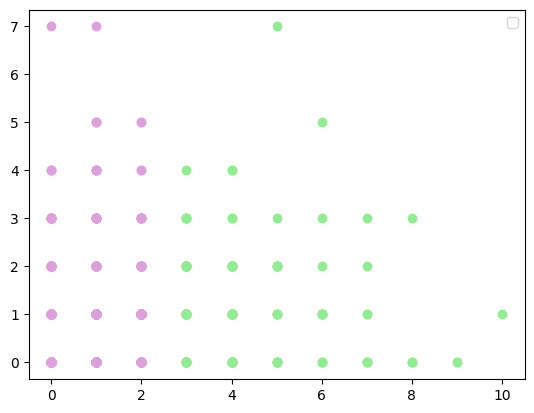

In [ ]:
# clustering with n = 2
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
plt.scatter(df0['home_score'], df0['away_score'], color='plum')
plt.scatter(df1['home_score'], df1['away_score'], color='lightgreen')
plt.legend()